<a href="https://colab.research.google.com/github/felipecortesl-dotcom/Tareas/blob/main/tarea_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Error máximo método orden 4: 3.351688344643833e-07
Error máximo método orden 5: 2.397856169178425e-08


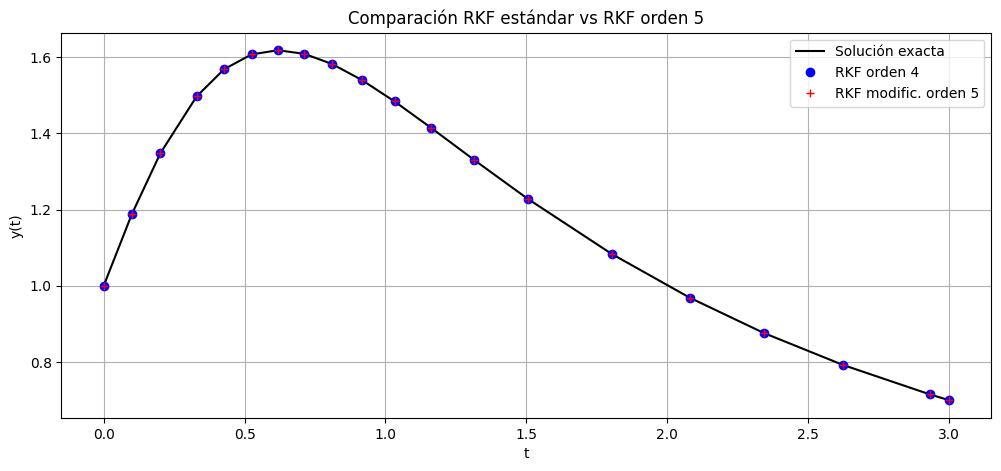

In [3]:
# ===============================================================
#   MÉTODO RUNGE–KUTTA–FEHLBERG (RKF45) – VERSIÓN MODIFICADA
#   Se usa la solución de orden 5 como solución aceptada
#   Tolerancia: 1e-6
#   Problema: y' = (2 - 2ty)/(t^2 + 1),  y(0)=1,  0 ≤ t ≤ 3
#   Solución exacta: y(t) = (2t+1)/(t^2+1)
# ===============================================================

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------
# Definición de la ecuación diferencial
# -----------------------------------------------
def f(t, y):
    return (2 - 2*t*y)/(t**2 + 1)

# -----------------------------------------------
# Solución exacta
# -----------------------------------------------
def y_exact(t):
    return (2*t + 1)/(t**2 + 1)

# -----------------------------------------------
# Implementación del método RKF45 general
# use_order = 4  → método estándar
# use_order = 5  → método modificado pedido
# -----------------------------------------------
def rkf45(t0, y0, b, tol=1e-6, h0=0.1, use_order=4):
    t = t0
    w = y0
    h = h0

    T = [t]
    W = [w]

    while t < b:

        if t + h > b:
            h = b - t

        # Cálculo de los k
        k1 = h * f(t, w)
        k2 = h * f(t + h/4, w + k1/4)
        k3 = h * f(t + 3*h/8, w + 3*k1/32 + 9*k2/32)
        k4 = h * f(t + 12*h/13, w + 1932*k1/2197 - 7200*k2/2197 + 7296*k3/2197)
        k5 = h * f(t + h, w + 439*k1/216 - 8*k2 + 3680*k3/513 - 845*k4/4104)
        k6 = h * f(t + h/2, w - 8*k1/27 + 2*k2 - 3544*k3/2565 + 1859*k4/4104 - 11*k5/40)

        # Aproximación orden 4
        w4 = w + 25*k1/216 + 1408*k3/2565 + 2197*k4/4104 - k5/5

        # Aproximación orden 5
        w5 = w + 16*k1/135 + 6656*k3/12825 + 28561*k4/56430 - 9*k5/50 + 2*k6/55

        # Estimador
        R = abs(w5 - w4)/h

        # Aceptar o rechazar paso
        if R <= tol:
            t += h
            w = w4 if use_order == 4 else w5
            T.append(t)
            W.append(w)

        # Actualizar paso
        if R == 0:
            q = 4
        else:
            q = 0.84*(tol/R)**0.25
            q = min(4, max(0.1, q))

        h *= q

    return np.array(T), np.array(W)
# Ejecutar método estándar y modificado
T4, W4 = rkf45(0, 1, 3, use_order=4)
T5, W5 = rkf45(0, 1, 3, use_order=5)

# Solución exacta en la malla del método de orden 5
YEX = y_exact(T5)

# Errores
err4 = np.abs(y_exact(T4) - W4)
err5 = np.abs(YEX - W5)

print("Error máximo método orden 4:", np.max(err4))
print("Error máximo método orden 5:", np.max(err5))
plt.figure(figsize=(12,5))
plt.plot(T5, YEX, 'k-', label='Solución exacta')
plt.plot(T4, W4, 'bo', label='RKF orden 4')
plt.plot(T5, W5, 'r+', label='RKF modific. orden 5')
plt.grid()
plt.legend()
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Comparación RKF estándar vs RKF orden 5")
plt.show()
